In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
#df = pd.read_table('Binding278to308K.dat')
#column_names=["Column1" ,"Column2" ,"Column3" ,"Column4","Column5"]
#df.to_excel('Binding278to308K.xlsx')

In [18]:
df = pd.read_excel('Binding278to308K.xlsx')
df

,Column1,Column2,Column3,Column4,Column5
0,3.280000e-10,0.0907,0.0728,0.0586,0.0419
1,7.838500e-10,0.0908,0.0727,0.0587,0.0408
2,1.731100e-09,0.0907,0.0732,0.0591,0.0408
3,3.691700e-09,0.0913,0.0726,0.0590,0.0410
4,7.744700e-09,0.0912,0.0733,0.0590,0.0411
5,1.613600e-08,0.0914,0.0738,0.0594,0.0413
6,3.345500e-08,0.0917,0.0741,0.0597,0.0419
7,6.936000e-08,0.0930,0.0756,0.0610,0.0431
8,1.436900e-07,0.0953,0.0772,0.0626,0.0449
9,2.974200e-07,0.0981,0.0815,0.0655,0.0480


In [19]:
def objective(x,a,b,c,d):
    return d + ((a-d)/(1+(x/c)**b))

278 K: y = 0.1882206812+((0.0905003593-0.1882206812)/(1+(x/0.0000232573)^0.6021608752)
288 K: y = 0.1670661946+((0.0726232453-0.1670661946)/(1+(x/0.0000165789)^0.6246175511)
298 K: y = 0.1435587436+((0.0584934545-0.1435587436)/(1+(x/0.0000121148)^0.6652574263)
308 K: y = 0.1177448238+((0.0407385912-0.1177448238)/(1+(x/0.0000089570)^0.6891917260)


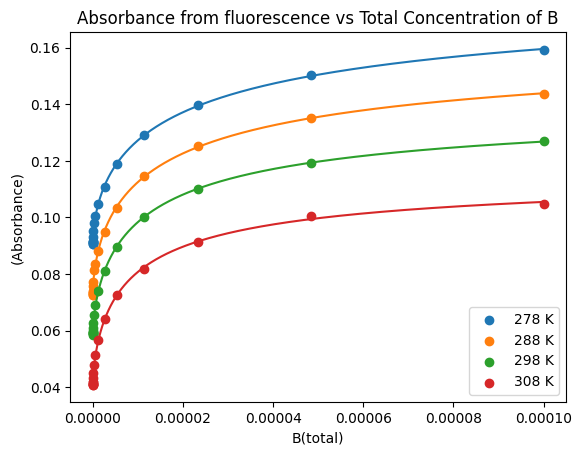

In [20]:
plt.scatter(x=df['Column1'],y=df['Column2'])
plt.scatter(x=df['Column1'],y=df['Column3'])
plt.scatter(x=df['Column1'],y=df['Column4'])
plt.scatter(x=df['Column1'],y=df['Column5'])
x,y1,y2,y3,y4 = df['Column1'],df['Column2'],df['Column3'],df['Column4'],df['Column5']
x_line = np.arange(min(x),max(x),x[1]-x[0])

popt,_ = curve_fit(objective,df['Column1'],df['Column2'])
a,b,c,d = popt
y_line = objective(x_line,a,b,c,d)
plt.plot(x_line,y_line,'-')
print('278 K: y = %.10f+((%.10f-%.10f)/(1+(x/%.10f)^%.10f)' % (d,a,d,c,b))

popt,_ = curve_fit(objective,df['Column1'],df['Column3'])
a,b,c,d = popt
y_line = objective(x_line,a,b,c,d)
plt.plot(x_line,y_line,'-')
print('288 K: y = %.10f+((%.10f-%.10f)/(1+(x/%.10f)^%.10f)' % (d,a,d,c,b))

popt,_ = curve_fit(objective,df['Column1'],df['Column4'])
a,b,c,d = popt
y_line = objective(x_line,a,b,c,d)
plt.plot(x_line,y_line,'-')
print('298 K: y = %.10f+((%.10f-%.10f)/(1+(x/%.10f)^%.10f)' % (d,a,d,c,b))

popt,_ = curve_fit(objective,df['Column1'],df['Column5'])
a,b,c,d = popt
y_line = objective(x_line,a,b,c,d)
plt.plot(x_line,y_line,'-')
print('308 K: y = %.10f+((%.10f-%.10f)/(1+(x/%.10f)^%.10f)' % (d,a,d,c,b))

plt.xlabel('B(total)')
plt.ylabel('(Absorbance)')
plt.title('Absorbance from fluorescence vs Total Concentration of B')
plt.legend(['278 K','288 K','298 K','308 K'])

plt.show()

In [21]:
x # Conentration of B

0     3.280000e-10
1     7.838500e-10
2     1.731100e-09
3     3.691700e-09
4     7.744700e-09
5     1.613600e-08
6     3.345500e-08
7     6.936000e-08
8     1.436900e-07
9     2.974200e-07
10    6.163000e-07
11    1.274400e-06
12    2.637300e-06
13    5.455900e-06
14    1.128300e-05
15    2.335400e-05
16    4.832600e-05
17    9.999200e-05
Name: Column1, dtype: float64

Ka1= -21490842.32671216
Kd1= -4.6531447432241616e-08


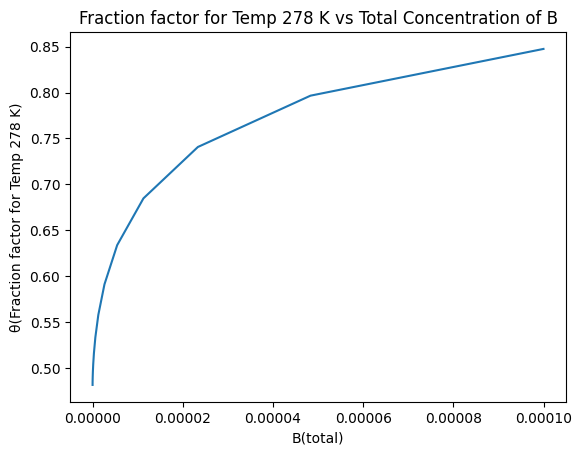

In [22]:
# For temperature 1
# y2 = 0.1882206812+((0.0905003593-0.1882206812)/(1+(x/0.0000232573)^0.6021608752)
D1 = 0.1882206812
A1 = 0.0905003593
C1 = 0.0000232573
B1 = 0.6021608752

y1 = D1+((A1-D1)/(1+(x/C1)**B1))
At =300 * 10**-9 # Total Concentration of A as (300 nM)
f1 = 1/D1 # factor to convert y into theta  as y approaches d , theta approaches 1
theta = f1*y1
plt.plot(x,theta)

plt.xlabel('B(total)')
plt.ylabel('θ(Fraction factor for Temp 278 K)')
plt.title('Fraction factor for Temp 278 K vs Total Concentration of B')
y1=0.5/f1
xhalf1 = (C1*(((A1-D1)/(y1-D1)-1)**(1/B1)))

BA= 150*10**-9
Bfree1= xhalf1-BA
Ka1 =1/Bfree1

print ('Ka1=', (Ka1))
Kd1 = 1/Ka1
print('Kd1=', (Kd1))

Ka2= 2052852.2830802025
Kd2= 4.871271100420094e-07


0.0835330973

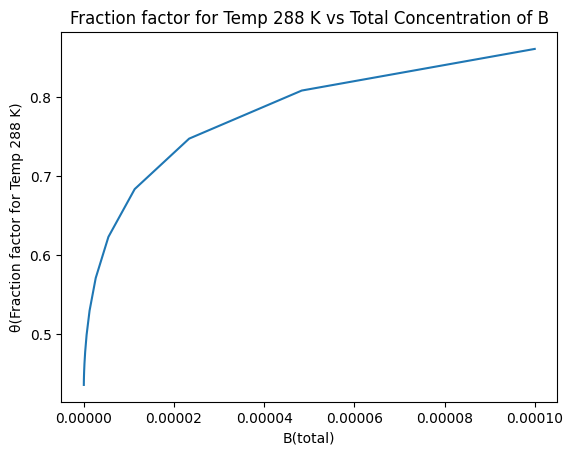

In [23]:
# For temperature 2
#y2 = 0.1670661946+((0.0726232453-0.1670661946)/(1+(x/0.0000165789)^0.6246175511)
D2 = 0.1670661946
A2 = 0.0726232453
C2 = 0.0000165789
B2 = 0.6246175511

y2 = D2+((A2-D2)/(1+(x/C2)**B2))
At =300 * 10**-9 # Total Concentration of A as (300 nM)
f2 = 1/D2 # factor to convert y into theta  as y approaches d , theta approaches 1
theta = f2*y2
plt.plot(x,theta)

plt.xlabel('B(total)')
plt.ylabel('θ(Fraction factor for Temp 288 K)')
plt.title('Fraction factor for Temp 288 K vs Total Concentration of B')
y2=0.5/f2
xhalf2 = (C2*(((A2-D2)/(y2-D2)-1)**(1/B2)))

BA= 150*10**-9
Bfree2= xhalf2-BA
Ka2 =1/Bfree2
print ('Ka2=', (Ka2))
Kd2 = 1/Ka2
print('Kd2=', (Kd2))
y2

Ka3= 1235225.1314783688
Kd3= 8.095690206716879e-07


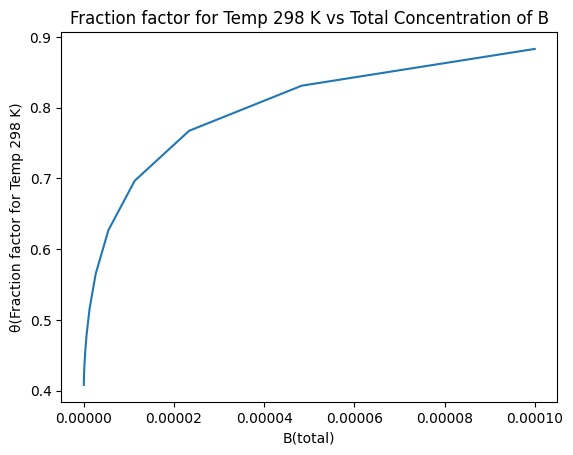

In [24]:
# For temperature 3
#y = 0.1435587436+((0.0584934545-0.1435587436)/(1+(x/0.0000121148)^0.6652574263)
D3 = 0.1435587436
A3 = 0.0584934545
C3 = 0.0000121148
B3 = 0.6652574263

y3 = D3+((A3-D3)/(1+(x/C3)**B3))
At =300 * 10**-9 # Total Concentration of A as (300 nM)
f3 = 1/D3 # factor to convert y into theta  as y approaches d , theta approaches 1
theta = f3*y3
plt.plot(x,theta)

plt.xlabel('B(total)')
plt.ylabel('θ(Fraction factor for Temp 298 K)')
plt.title('Fraction factor for Temp 298 K vs Total Concentration of B')
y3=0.5/f3
xhalf3 = (C3*(((A3-D3)/(y3-D3)-1)**(1/B3)))

BA= 150*10**-9
Bfree3= xhalf3-BA 
Ka3 =1/Bfree3
print ('Ka3=', (Ka3))
Kd3 = 1/Ka3
print('Kd3=', (Kd3))

Ka4= 679260.9254699461
Kd4= 1.4721883189558575e-06


1.6221883189558575e-06

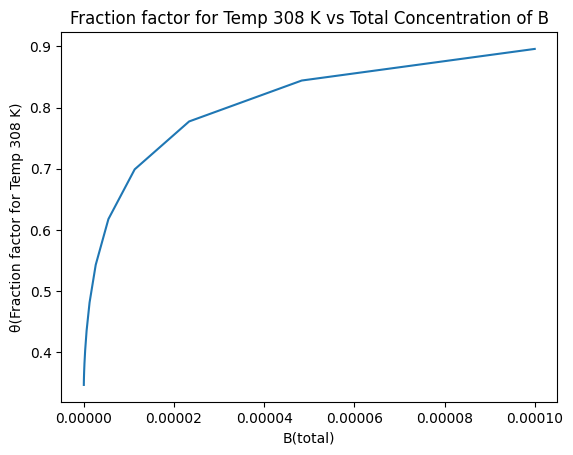

In [25]:
# For temperature 4
#y = 0.1177448238+((0.0407385912-0.1177448238)/(1+(x/0.0000089570)^0.6891917260)
D4 = 0.1177448238
A4 = 0.0407385912
C4 = 0.0000089570
B4 = 0.6891917260

y4 = D4+((A4-D4)/(1+(x/C4)**B4))
At =300 * 10**-9 # Total Concentration of A as (300 nM)
f4 = 1/D4 # factor to convert y into theta (fraction) as y (absorbance) approaches d (maximal value) , theta approaches 1
theta4 = f4*y4
plt.plot(x,theta4)

plt.xlabel('B(total)')
plt.ylabel('θ(Fraction factor for Temp 308 K)')
plt.title('Fraction factor for Temp 308 K vs Total Concentration of B')
y4=0.5/f4
xhalf4 = (C4*(((A4-D4)/(y4-D4)-1)**(1/B4)))
BA= 0.5*At
Bfree4= xhalf4-BA
Ka4 =1/Bfree4
print ('Ka4=', (Ka4))
Kd4 = 1/Ka4
print('Kd4=', (Kd4))
xhalf4

Text(0.5, 1.0, 'Fraction factor for Temp 278 K vs Total Concentration of B')

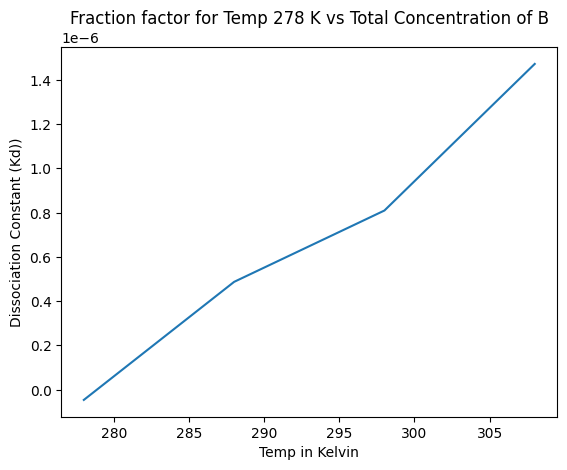

In [26]:
KD=[Kd1,Kd2,Kd3,Kd4]
Temp =[278,288,298,308]
plt.plot(Temp,KD)

plt.xlabel('Temp in Kelvin')
plt.ylabel('Dissociation Constant (Kd))')
plt.title('Fraction factor for Temp 278 K vs Total Concentration of B')